# **THE SPARKS FOUNDATION**

**IoT & Computer Vision (GRIP APRIL ' 21)**

# **AUTHOR: AAMIR P** 

**TASK 2--> Color Identification in Images** 

## **Working with OpenCV**

Saving image.jpg to image.jpg


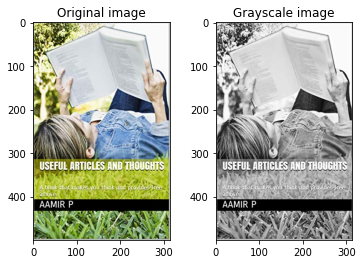

In [20]:
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline

from google.colab import files
uploaded = files.upload()

img = cv2.imread('image.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img[..., ::-1])  # BGR to RGB
ax[0].set_title('Original image')

ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title('Grayscale image')

plt.show()

## **Color Identification**

In [33]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

## KMeans expects flattened array as input during its fit method. Thus, I need to reshape the image using numpy. Then, I apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order.I now plot the colors as a pie chart.

## I have combined all the steps in two method. 

In [34]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [35]:

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([199.74105868, 203.61225356, 199.49793588]),
 array([57.78514132, 69.68489354, 48.7676704 ]),
 array([175.13839102, 190.99415105,  56.84457518]),
 array([112.59251738, 146.1879269 , 186.78444403]),
 array([236.63722229, 237.75625231, 231.34308653]),
 array([115.55973405, 131.34419194,  58.08731443]),
 array([168.56814552, 178.21614147, 128.35227671]),
 array([ 8.16005727, 10.48951005,  6.07974849])]

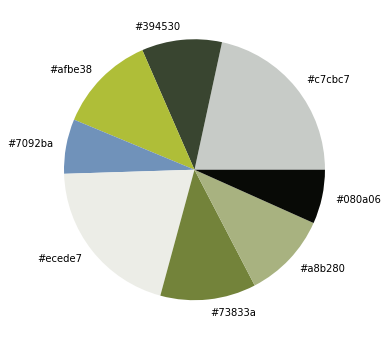

In [37]:
get_colors(get_image('image.jpg'), 8, True)